In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(arr):

    if arr.dtype != 'bool':
        raise ValueError('arr should be a boolean ndarray')
    colors = np.empty(arr.shape, dtype='U5')
    colors[:] = 'white'
    colors[arr] = 'black'
    x, y = np.indices((arr.shape))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.patch.set_facecolor('green')
    ax.patch.set_alpha(1.0)

    plt.scatter(x, y, c=colors.ravel())
    plt.show()

In [ ]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    current = start
    post = [0]
    for i in range(niter):
        p = value(current, **kwargs)
        index = np.random.choice(8,2)
        proposed = proposal(current, index, **kwargs)
        p /= value(proposed, **kwargs)
        if np.random.uniform() > p:
            current = proposed
        else:
            current[index[0]][index[1]] = 0;
        post.append(int(np.sum(current)))
    plot_grid(current.astype('bool'))
    return post[nburn:]

In [ ]:
def value(current, **kwargs):
    _ = kwargs
    return current.sum()

In [ ]:
def proposal(current, place, **kwargs):
    _ = kwargs
    place = np.random.choice(8,2)
    
    summa = 0
    if place[0]!=0:
        summa+=current[place[0]-1][place[1]]
    if place[0]!=7:
        summa+=current[place[0]+1][place[1]]
    if place[1]!=0:
        summa+=current[place[0]][place[1]-1]
    if place[1]!=7:
        summa+=current[place[0]][place[1]+1]
    
    if summa==0:
        current[place[0]][place[1]] = 1
    else:
        current[place[0]][place[1]] = 0
    return current

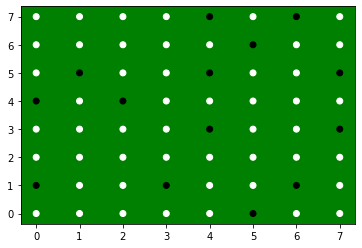

In [ ]:
size = 8
post = metroplis(np.zeros((8,8)), value, proposal, 10000)

In [ ]:
print("Estimated number of vertices: ")
print(sum(post)/len(post))

Estimated number of vertices: 
15.210578942105789


Text(0.5, 0, 'Iteration')

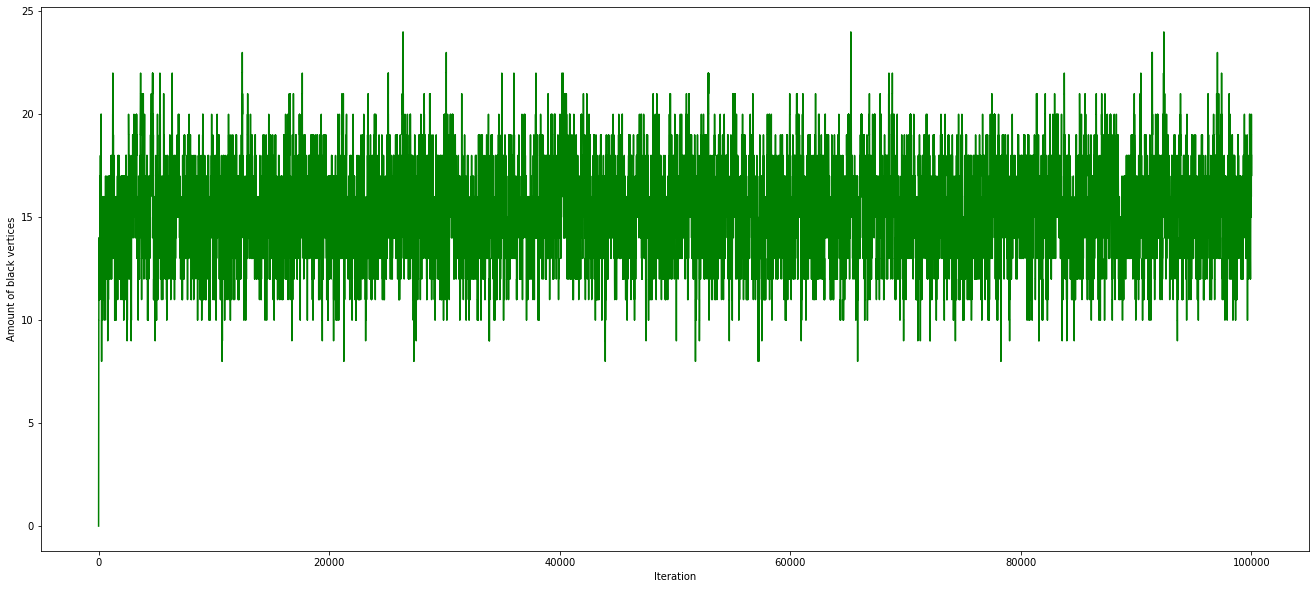

In [ ]:
plt.figure(figsize=(50,10))
plt.subplot(1,2,2)
plt.plot(post, color = 'green')
plt.ylabel("Amount of black vertices")
plt.xlabel("Iteration")

#Несмотря на хорошую сходимость, амплитуда выбросов практически не уменьшается

In [ ]:
from scipy import stats
def g_test(x, start=0.01, end=0.09):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

In [ ]:
g_test(post[2000:])


Ttest_indResult(statistic=-12.100925399205044, pvalue=5.9289102739646e-32)